### Background and Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective
1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Importing necessary packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


### Importing dataset, checking the shape and first 5 rows in the dataset

In [2]:
Loan = pd.read_csv("Loan_Modelling.csv")
Loan.shape

(5000, 14)

In [3]:
Loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Checking missing values

In [4]:
Loan.isnull().sum().sort_values(ascending = False)

CreditCard            0
Online                0
CD_Account            0
Securities_Account    0
Personal_Loan         0
Mortgage              0
Education             0
CCAvg                 0
Family                0
ZIPCode               0
Income                0
Experience            0
Age                   0
ID                    0
dtype: int64

- There are no missing values in the dataset

### Checking the datatypes 

In [5]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- We might have to convert Family, Education, Personal_Loan, Securities_Account, CD_Account, Online and CreditCard columns to category

In [6]:
Loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- Age in the dataset ranges from 23 to 67 years.
- The range of income in the dataset is from 8000 to 224000.
- Zipcode doesn't give us much other than all the customers in the dataset are from California.
- There are negative values in Experience column which seems incorrect, we need to fix these before modeling
- More than 50% of the population don't have mortgage
- ID column doesn't add any value, will be removed before model building
- More than 50% of the population doesnot have a mortgage or use a Creditcard other than AllLife Bank
- More than 75% of the population didnot take a Personal Loan and they don't have Securities Account or Certificate of Deposit account with AllLife Bank

### Copying the dataset 

In [7]:
df = Loan.copy()

### Fixing the incorrect values in Experience column

In [8]:
df_Positive_Experience = df[df['Experience'] > 0]
df_Negative_Experience =  df[df['Experience'] < 0]
df_Negative_Experience_List = df_Negative_Experience['ID'].tolist()

for id in df_Negative_Experience_List:
    age_values = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education_values = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    positive_Experience_Filtered = df_Positive_Experience[(df_Positive_Experience['Age'] == age_values) 
                                                          & (df_Positive_Experience['Education'] == education_values)]
    if positive_Experience_Filtered.empty :
        negative_Experience_Filtered = df_Negative_Experience[(df_Negative_Experience['Age'] == age_values) 
                                                              & (df_Negative_Experience['Education'] == education_values)]
        exp = round(negative_Experience_Filtered['Experience'].median())
    else:
        exp = round(positive_Experience_Filtered['Experience'].median())
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = abs(exp)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134800,11.414863,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Converting datatypes to category for EDA purposes

In [10]:
#df["Family"] = df["Family"].astype("category")
#df["Education"] = df["Education"].astype("category")
df["Personal_Loan"] = df["Personal_Loan"].astype("category")
#df["Securities_Account"] = df["Securities_Account"].astype("category")
#df["CD_Account"] = df["CD_Account"].astype("category")
#df["Online"] = df["Online"].astype("category")
#df["CreditCard"] = df["CreditCard"].astype("category")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(12)
memory usage: 512.9 KB


- Memory usage is reduced from 547KB to 308.5KB

## Univariate Analysis

### Numerical Variable analysis

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

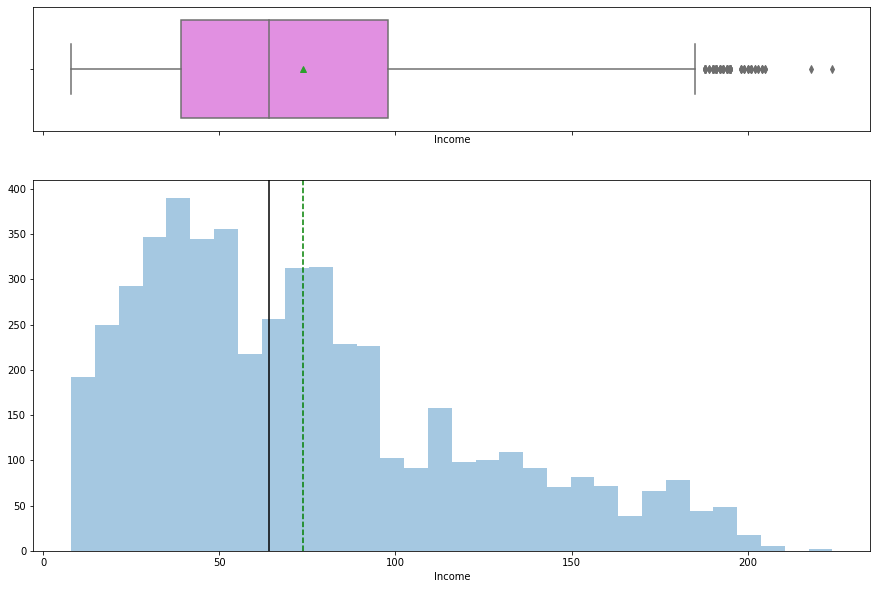

In [14]:
histogram_boxplot(df["Income"])

Observations:
- Mean and Median is around 45 years
- The number of customers around 59 years are the highest when compared to other ages

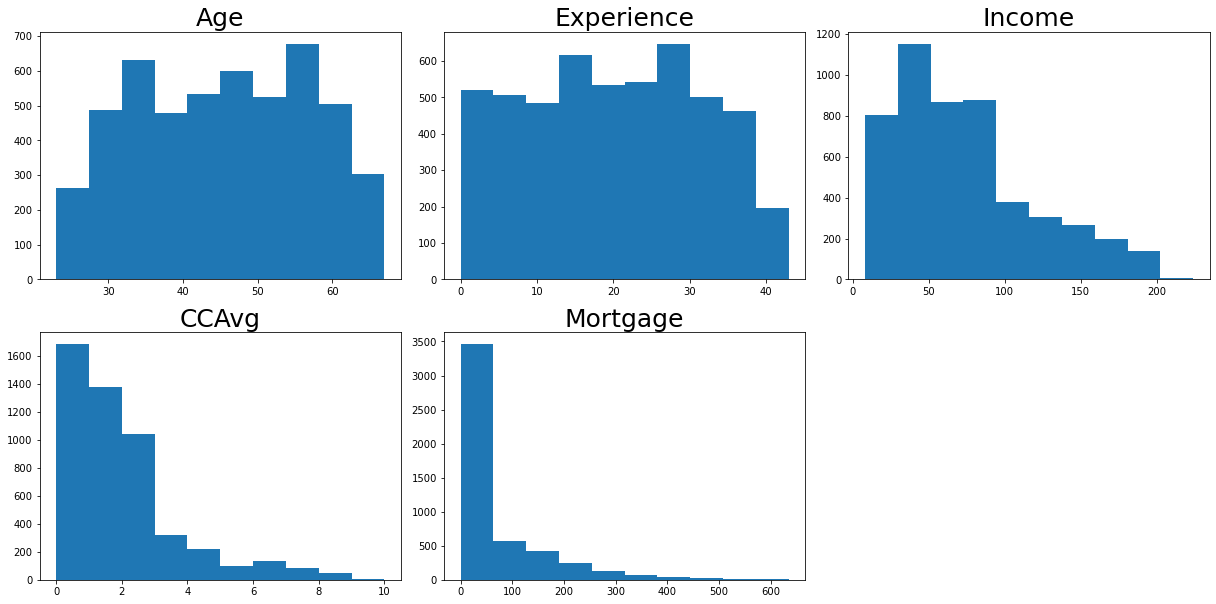

In [15]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

Observations:
- Income, CCAvg and Mortgage are right skewed
- Credit Card Average and Mortgage is 0 for majority of customers 

### Univariate analysis of categorical variables

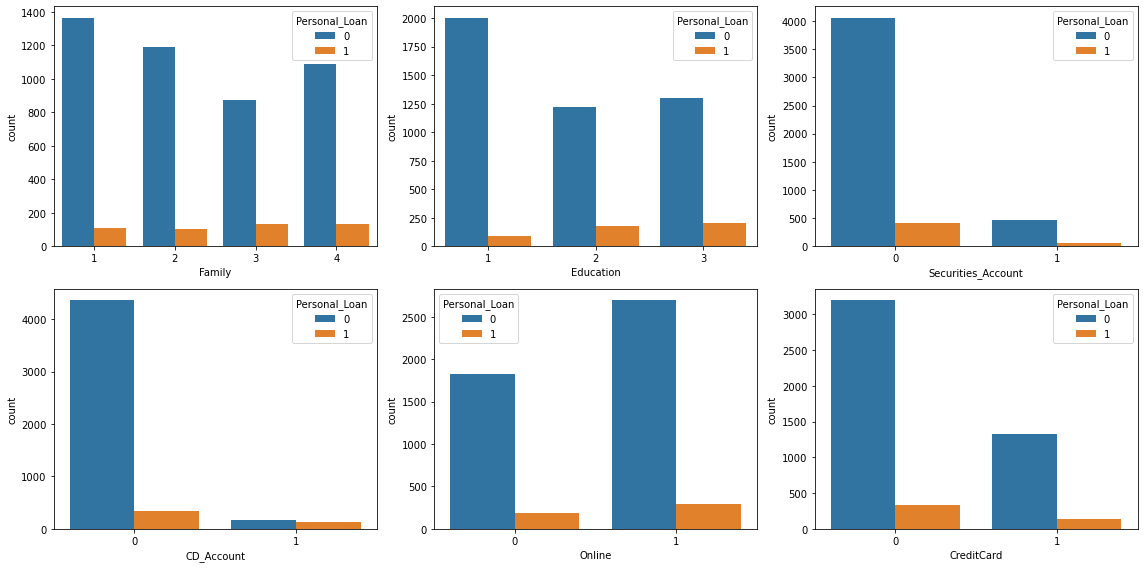

In [16]:
cols1 = ["Family", "Education","Securities_Account", "CD_Account", "Online", "CreditCard"]
plt.figure(figsize = (16,8))
for i in range(len(cols1)):
    plt.subplot(2,3,i+1)
    sns.countplot(df[cols1[i]], hue = df["Personal_Loan"])
    plt.tight_layout()
plt.savefig("countplots.png")

Observations:
* Customers with family greater than 2 tend to have taken personal loan
* Majority of customers in the dataset have not taken personal Loan
* Cutomers with higher education tend to take a personal Loan
* Having Securities Account, Certificate of Deposit Account and Creditcard didnot have much impact on taking a personal loan, but customers who use Online Banking have higher chances of taking a personal loan.

In [17]:
catcols = ["Family", "Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]

In [18]:
for colname in catcols:
    values = df[colname].value_counts()/len(df[colname]) * 100
    print(values)
    print('\n')

1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64


1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64


0    90.4
1     9.6
Name: Personal_Loan, dtype: float64


0    89.56
1    10.44
Name: Securities_Account, dtype: float64


0    93.96
1     6.04
Name: CD_Account, dtype: float64


1    59.68
0    40.32
Name: Online, dtype: float64


0    70.6
1    29.4
Name: CreditCard, dtype: float64




Observations:
* Around 90.4% of customers in the dataset given didnot take Personal Loan
* Majority of customers donot have either Securities Account or Cash Deposit Account
* Nearly 60% of the customers in the dataset use internet banking facility
* Nearly 42% of customers have completed undergraduate

### Bivariate Analysis

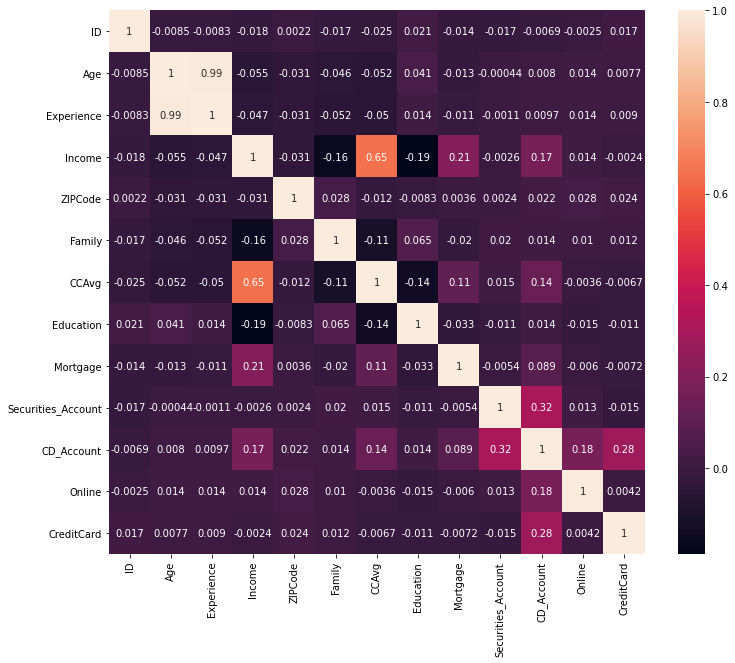

In [19]:
plt.figure(figsize =(12,10))
sns.heatmap(df.corr(), annot = True);
plt.savefig("Heatmap.png")

Observations:
* Age and Experience are highly correlated which means as the age of the customer increases their professional Experience also increases
* CreditCard Average and Income have a correlation which means customers who earn more spend more on creditcard

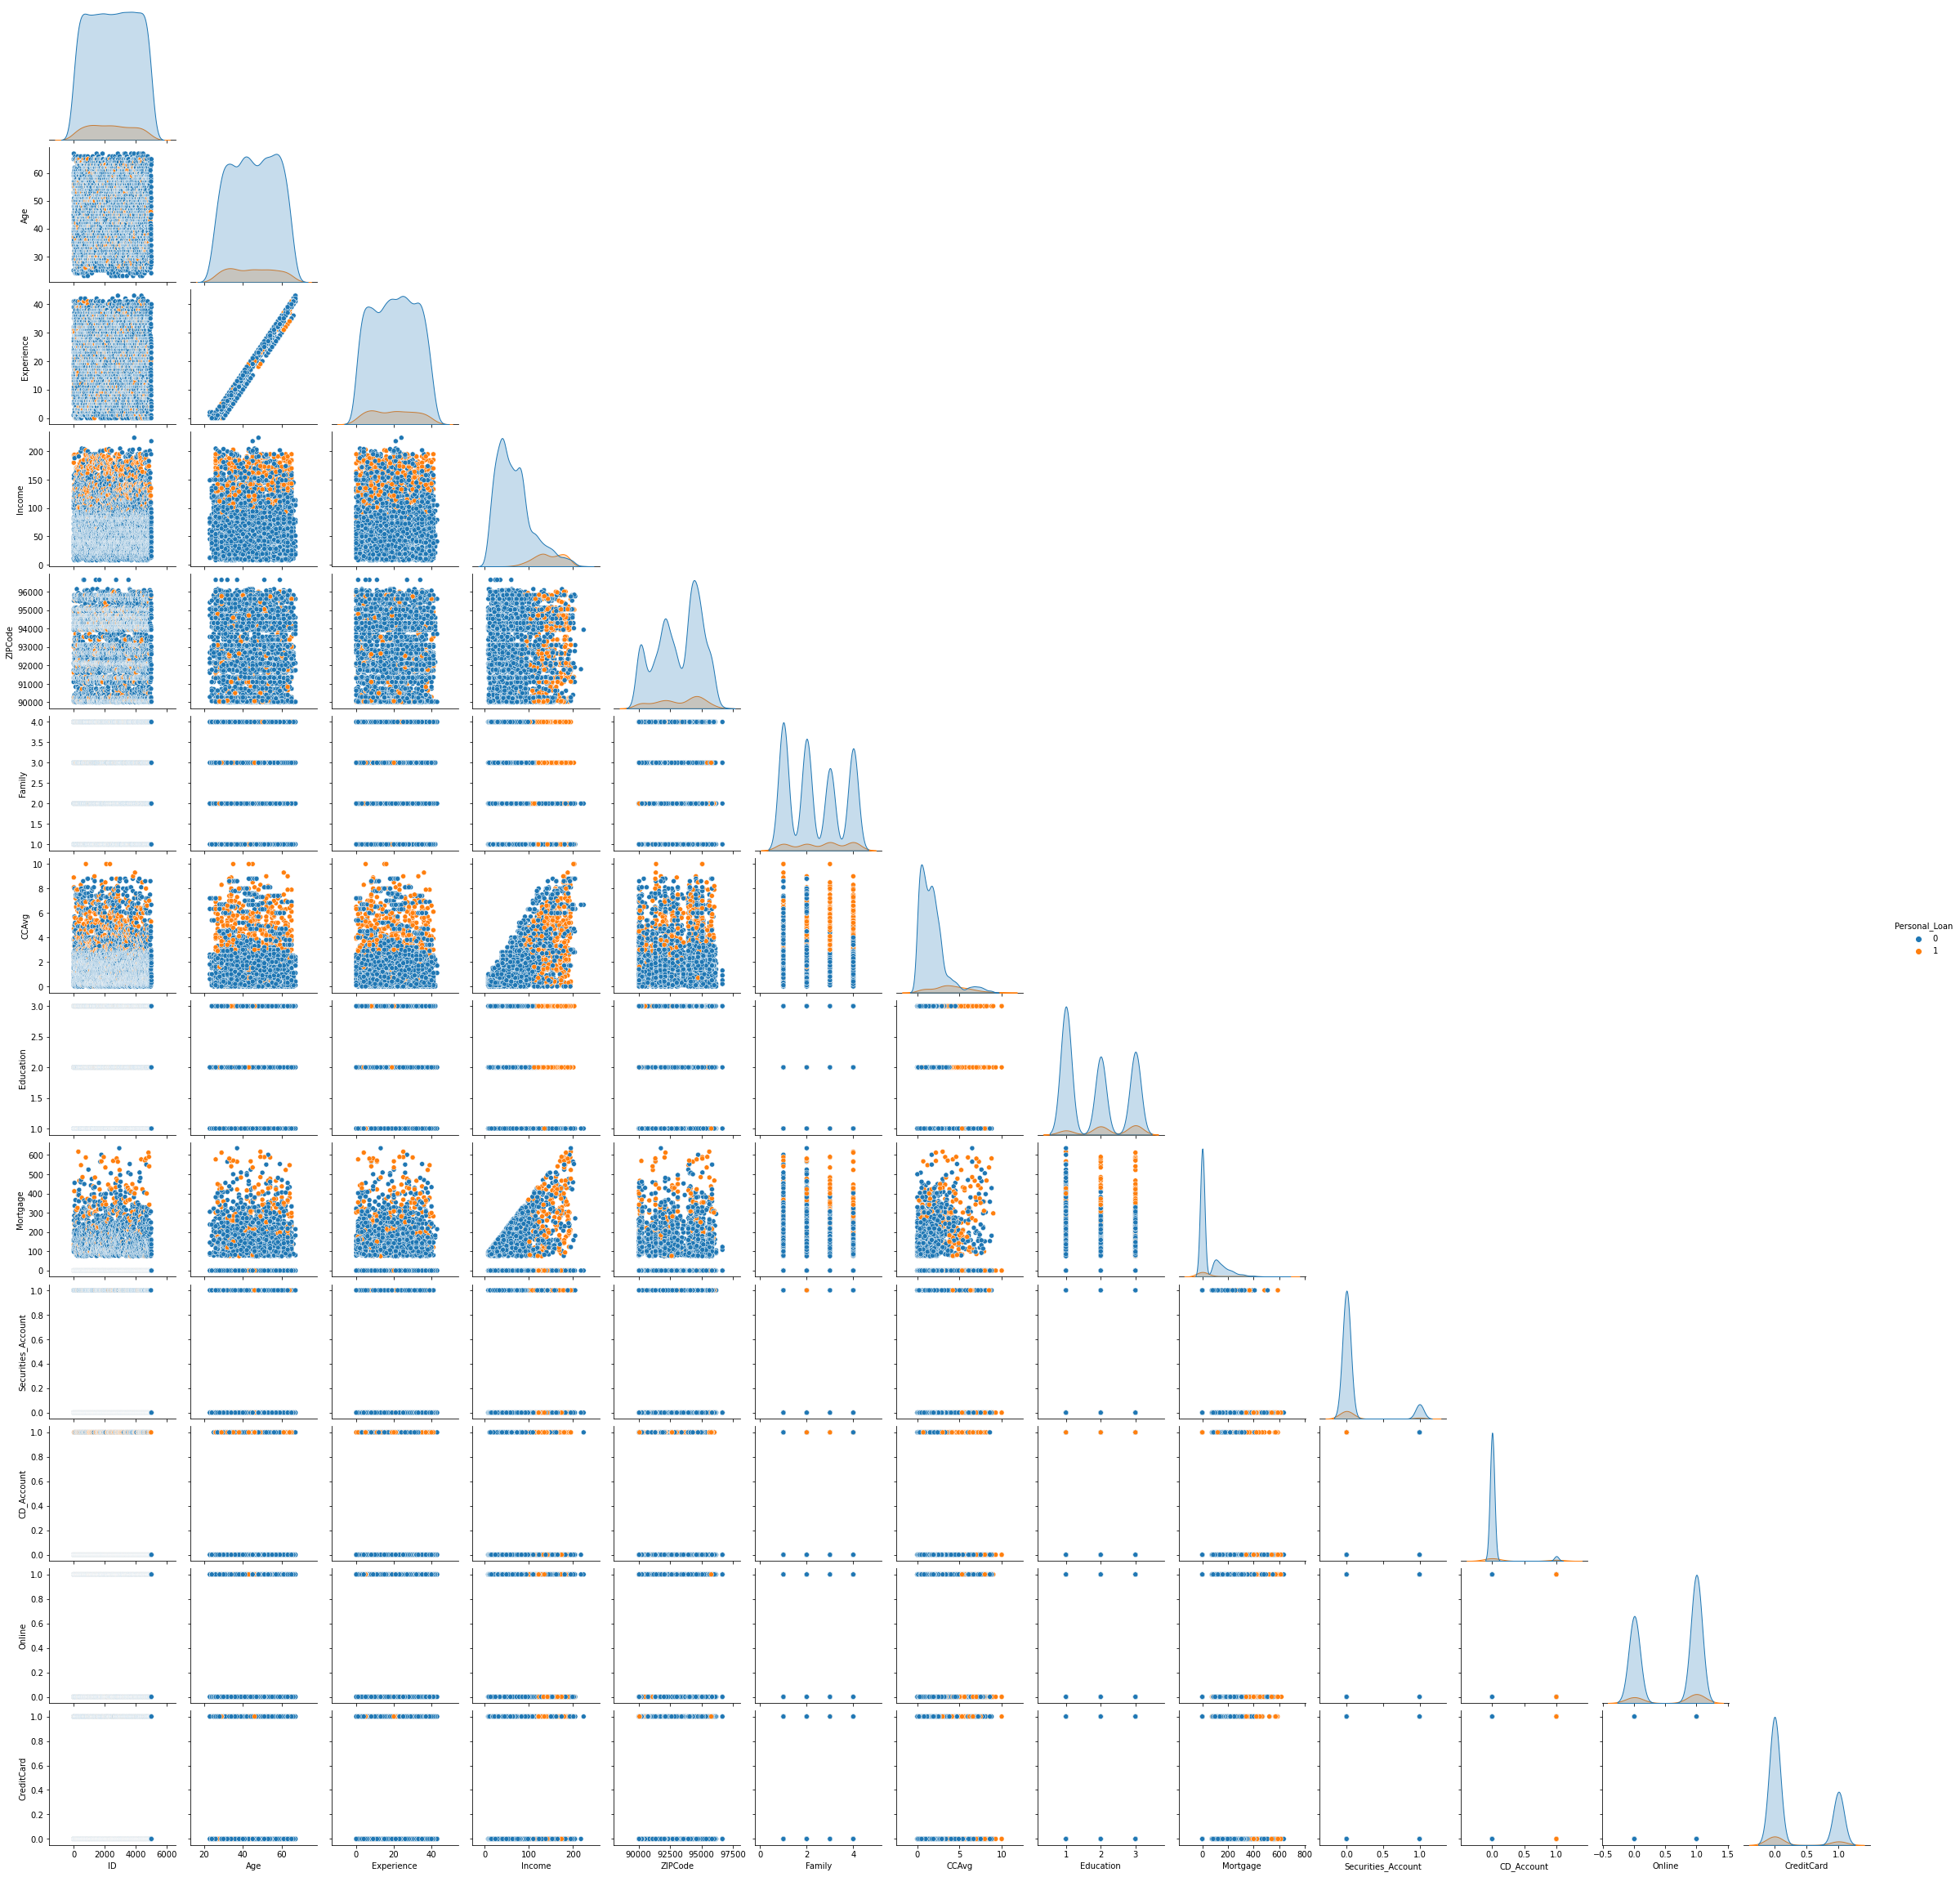

In [20]:
sns.pairplot(df, hue = "Personal_Loan", corner = True);

Observations: 
* Customers who tend to have higher income have taken personal Loan
* Customers who have a graduation or higher education tend to take a personal loan
* Customers with income greater than 100K, have an education level of graduation and higher, with a Family greater than 2 tend to take personal Loan.

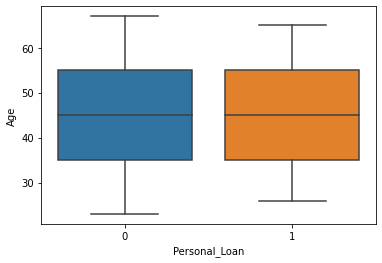

In [21]:
sns.boxplot(x = "Personal_Loan",y = "Age", data = df);

- Average age of customer with or without loan is similar, age doesn't seem to be a significant feature 

<AxesSubplot:xlabel='Personal_Loan', ylabel='Experience'>

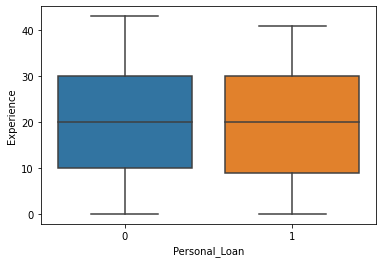

In [22]:
sns.boxplot(x = "Personal_Loan",y = "Experience", data = df)

- Median of experience for customers who have taken a loan and who have not is very close

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

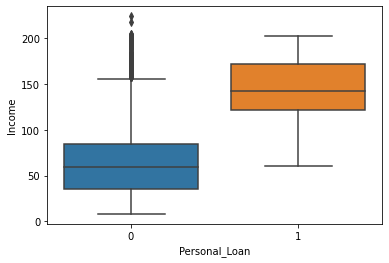

In [23]:
sns.boxplot(x = "Personal_Loan",y = "Income", data = df)

- Customers who have taken Personal loan have higher income, Lowest income of customer who have taken personal loan is around 55000
- There are outliers in the income of cutomers who have not taken Personal Loan

<AxesSubplot:xlabel='Personal_Loan', ylabel='CCAvg'>

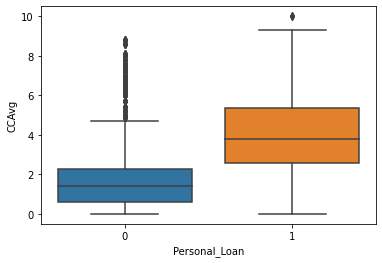

In [24]:
sns.boxplot(x = "Personal_Loan",y = "CCAvg", data = df)

- Customers with higher creditcard usage have higher chances of taking a personal Loan
- Average credit card usage of the customer who has taken a personal loan is around 4000 

<AxesSubplot:xlabel='Personal_Loan', ylabel='Mortgage'>

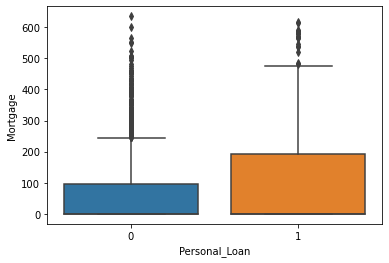

In [25]:
sns.boxplot(x = "Personal_Loan",y = "Mortgage", data = df)

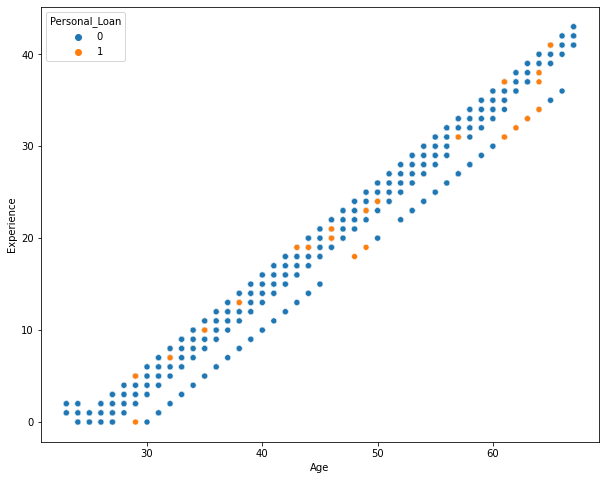

In [26]:
plt.figure(figsize =(10,8))
sns.scatterplot(x = "Age", y = "Experience", hue = "Personal_Loan", data = df);

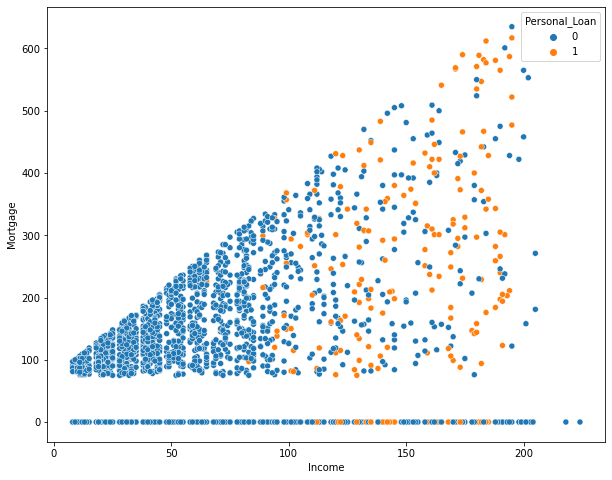

In [27]:
plt.figure(figsize =(10,8))
sns.scatterplot(x = "Income", y = "Mortgage", hue = "Personal_Loan", data = df);
plt.savefig("MortgageIncome.png")

- Customers with higher income and greater mortgage tend to take a personal Loan

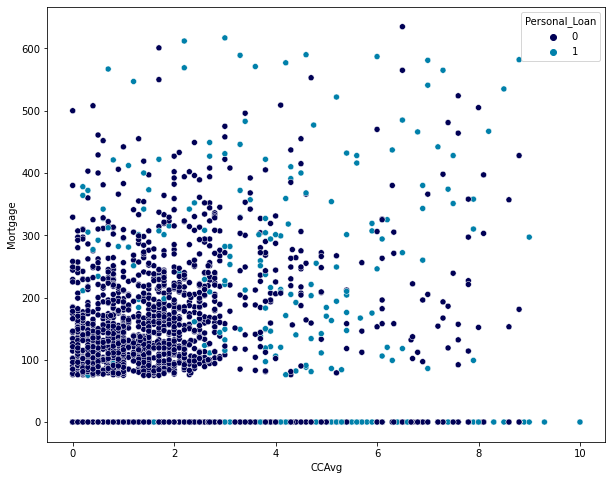

In [28]:
plt.figure(figsize =(10,8))
sns.scatterplot(x = "CCAvg", y = "Mortgage", hue = "Personal_Loan", data = df, ci = False, palette = "ocean");

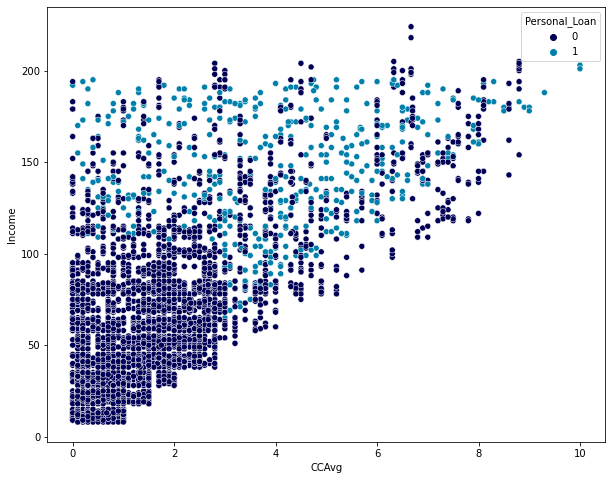

In [29]:
plt.figure(figsize =(10,8))
sns.scatterplot(x = "CCAvg", y = "Income", hue = "Personal_Loan", data = df, ci = False, palette = "ocean");
plt.savefig("CCAvgIncome.png")

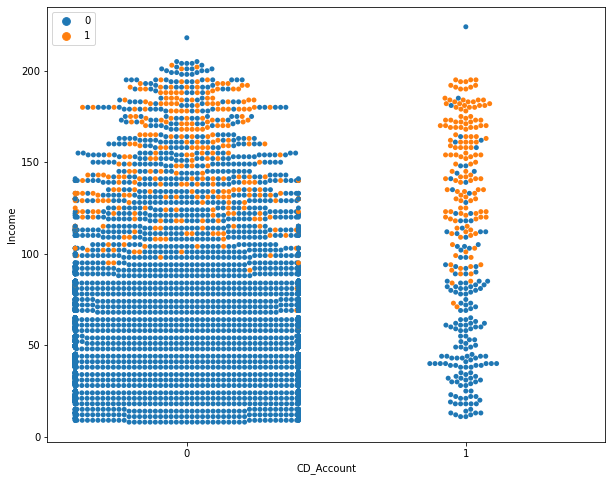

In [30]:
plt.figure(figsize =(10,8))
sns.swarmplot(x = "CD_Account", y = "Income",hue = "Personal_Loan", data = df)
plt.savefig("CD_AccountIncome.png")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1);

* Customers with Savings account and having a income of greater than 80000 have purchased a personal loan

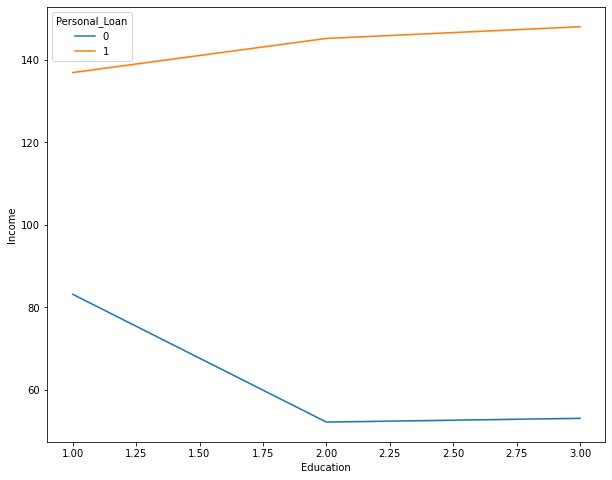

In [31]:
plt.figure(figsize =(10,8))
sns.lineplot(x = "Education", y = "Income", data = df, hue = "Personal_Loan", ci = False);
plt.savefig("EducationIncome")

* Graduate and Advanced/Professional customers who have lower income donot have a personal loan

In [32]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


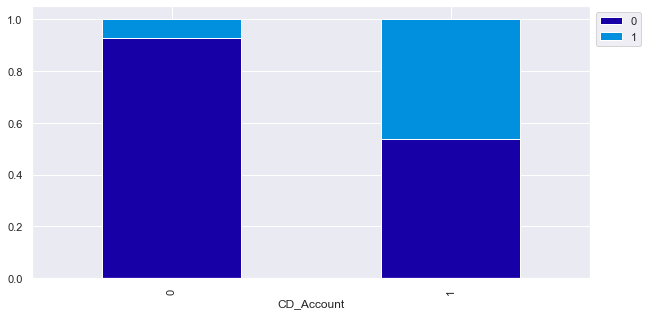

In [33]:
stacked_plot(df["CD_Account"])

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


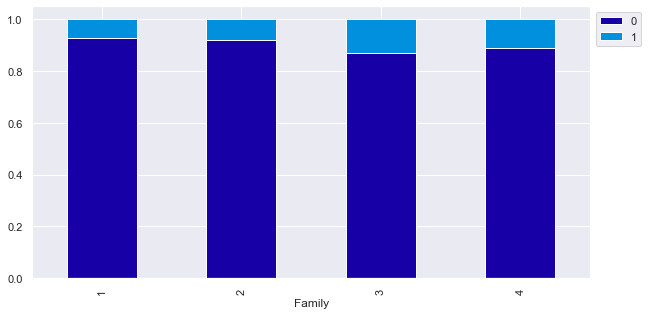

In [34]:
stacked_plot(df["Family"])

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


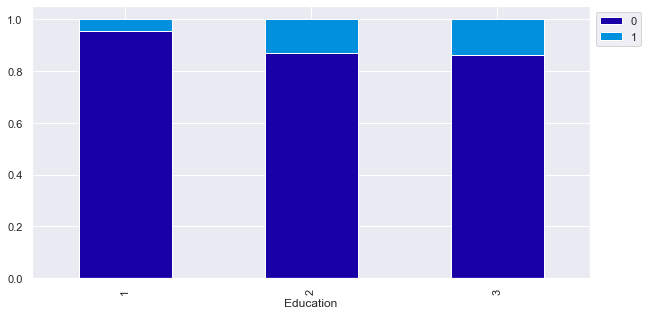

<Figure size 432x288 with 0 Axes>

In [35]:
stacked_plot(df["Education"])
plt.savefig("EducationCount.png")

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


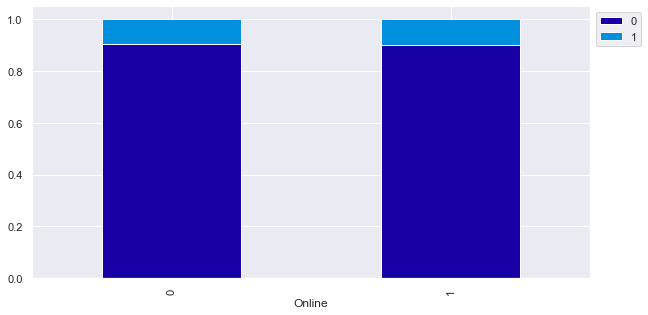

In [36]:
stacked_plot(df["Online"])

### EDA Insights
1. Cutomers with Education higher than graduation level tend to take a personal Loan
2. Aged Customers have more professional Experience.
3. Customers with Family greater than 2 tend to take personal loan.
4. Customers with higher Income tend to have higher Mortgage and tend to spend more as their credit card average is higher
5. Income increases with education for customers who have a personal loan
6. Around 60% of the customers don't have mortgage

### Splitting data

In [37]:
df.drop(["ID", "ZIPCode"], axis = 1, inplace = True)

In [38]:
df["Family"] = df["Family"].astype("category")
df["Education"] = df["Education"].astype("category")
df["Personal_Loan"] = df["Personal_Loan"].astype("category")
df["Securities_Account"] = df["Securities_Account"].astype("category")
df["CD_Account"] = df["CD_Account"].astype("category")
df["Online"] = df["Online"].astype("category")
df["CreditCard"] = df["CreditCard"].astype("category")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.4 KB


In [40]:
def split(*kwargs):
    '''
    Function to split data into X and Y then one hot encode the X variable.
    Returns training and test sets
    *kwargs : Variable to remove from the dataset before splitting into X and Y
    '''
    X = df.drop([*kwargs], axis=1)
    Y = df['Personal_Loan']
    
    X = pd.get_dummies(X,drop_first=True)
    X = add_constant(X)

    #Splitting data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
    return X_train,X_test, y_train, y_test

In [41]:
X_train,X_test, y_train, y_test = split('Personal_Loan')

X_train.head()

,const,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
1334,1.0,47,22,35,1.3,0,1,0,0,0,0,0,0,1,0
4768,1.0,38,14,39,2.0,0,0,0,0,1,0,0,0,1,0
65,1.0,59,35,131,3.8,0,0,0,0,0,0,0,0,1,1
177,1.0,29,3,65,1.8,244,0,0,1,1,0,0,0,0,0
4489,1.0,39,13,21,0.2,0,0,1,0,1,0,0,0,1,0


## Logistic Regression
### Model evaluation criterion
### Model can make wrong predictions as:
1. Predicting a customer has taken a loan but actually the person didnot take a personal loan
2. Predicting a customer has not taken a loan where actually the person did take a personal loan

### Which loss is greater?
- Not offering the customer who will accept the loan i.e, False Negative, Predicting a customer will not take a loan while person takes it in this case bank lost a potential customer.

### How to reduce this loss i.e need to reduce False Negatives?
- Bank needs to maximize Recall which reduces False Negatives

* Defining functions to calculate metrics to evaluate the model performance with threshold (0.5) and without threshold.

In [42]:
def get_metrics_score1(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict(train)>threshold)
    pred_test = (model.predict(test)>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [43]:
def get_metrics_score2(model,train,test,train_y,test_y,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    flag: If the flag is set to True then only the print statements shwoing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
        
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [44]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train,y_train)

# Let's check model performances for this model
scores_LR = get_metrics_score2(model,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.9602857142857143
Accuracy on test set :  0.9526666666666667
Recall on training set :  0.6797583081570997
Recall on test set :  0.5973154362416108
Precision on training set :  0.872093023255814
Precision on test set :  0.89
F1 on training set :  0.7640067911714771
F1 on test set :  0.714859437751004


* We have built a logistic regression model which has a good accuracy on training and testing but recall is the important metric in our regression model as stated earlier which is 0.68 (training) and 0.60 (test) which are close but will see if we can improve these by checking statsmodel and remove features which are not significant.

### Logistic regression with threshold of 0.5
We will use the function created earlier (get_metrics_score1) and check model evaluation metrics with 0.5 threshold

In [45]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg,X_train,X_test,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.107513
         Iterations 10
Accuracy on training set :  0.9622857142857143
Accuracy on test set :  0.9573333333333334
Recall on training set :  0.6948640483383686
Recall on test set :  0.6308724832214765
Precision on training set :  0.8812260536398467
Precision on test set :  0.912621359223301
F1 on training set :  0.777027027027027
F1 on test set :  0.746031746031746


- Recall has improved with threshold but not a significant change
- We Will check the statsmodel for the significance of the variables.
- Check multicollinearity between independent variables using VIF (Variation Inflation Factor)

In [46]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Fri, 04 Jun 2021   Pseudo R-squ.:                  0.6565
Time:                        19:09:52   Log-Likelihood:                -376.30
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                9.076e-299
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.5372      2.184     -6.199      0.000     -17.817      -9.257
Age                      0.0047      0.080      0.059      0.953      -0.151       0.161
Experience               0.0004      0.080      0.006      0.996      -0.156       0.157
Income                   0.0628      0.004     16.318      0.000       0.055       0.070
CCAvg                    0.2466      0.058      4.243      0.000       0.133       0.360
Mortgage                 0.0009      0.001      1.221      0.222      -0.001       0.002
Family_2                 0.0316      0.291      0.108      0.914      -0.539       0.603
Family_3                 2.4887      0.315      7.893      0.000       1.871       3.107
Family_4                 1.6423      0.310      5.293      0.000       1.034       2.251
Education_2              4.0040      0.347     11.539      0.000       3.324       4.684
Education_3              4.2665      0.347     12.290      0.000       3.586       4.947
Securities_Account_1    -1.0693      0.406     -2.635      0.008      -1.864      -0.274
CD_Account_1             3.7096      0.437      8.483      0.000       2.852       4.567
Online_1                -0.5854      0.206     -2.842      0.004      -0.989      -0.182
CreditCard_1            -0.9981      0.270     -3.701      0.000      -1.527      -0.470
========================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


# print(checking_vif(x_train))

In [48]:
print(checking_vif(X_train))

                 feature         VIF
0                  const  449.018561
1                    Age   92.407558
2             Experience   92.313699
3                 Income    1.890241
4                  CCAvg    1.740422
5               Mortgage    1.046777
6               Family_2    1.402647
7               Family_3    1.383770
8               Family_4    1.425901
9            Education_2    1.300065
10           Education_3    1.333535
11  Securities_Account_1    1.147612
12          CD_Account_1    1.363461
13              Online_1    1.041173
14          CreditCard_1    1.111212


* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.


* From the EDA we have noticed that age and experience has a strong correlation which explains the high VIF for these columns. We will remove Experience and see the VIF values.

In [49]:
X_train1 = X_train.drop(['Experience'],axis=1)
X_test1 = X_test.drop(['Experience'],axis=1)
print(checking_vif(X_train1))

                 feature        VIF
0                  const  28.099383
1                    Age   1.013870
2                 Income   1.886532
3                  CCAvg   1.735495
4               Mortgage   1.046757
5               Family_2   1.402108
6               Family_3   1.380496
7               Family_4   1.425783
8            Education_2   1.287147
9            Education_3   1.258075
10  Securities_Account_1   1.147251
11          CD_Account_1   1.362642
12              Online_1   1.041048
13          CreditCard_1   1.111167


* After we removed Experience, we see that all the other columns has a VIF value less than 2.
#### Let's create a model with all the features expect Experience

In [50]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg1,X_train1,X_test1,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.107513
         Iterations 10
Accuracy on training set :  0.9622857142857143
Accuracy on test set :  0.9573333333333334
Recall on training set :  0.6948640483383686
Recall on test set :  0.6308724832214765
Precision on training set :  0.8812260536398467
Precision on test set :  0.912621359223301
F1 on training set :  0.777027027027027
F1 on test set :  0.746031746031746


- Multicolinearity is removed but recall is very similar, let's check the statsmodel and remove features that has P value > 0.05 as they are insignificant in predicting the dependent variable

In [51]:
lg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Fri, 04 Jun 2021   Pseudo R-squ.:                  0.6565
Time:                        19:09:52   Log-Likelihood:                -376.30
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                8.458e-300
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.5484      0.839    -16.143      0.000     -15.193     -11.903
Age                      0.0052      0.009      0.607      0.544      -0.012       0.022
Income                   0.0628      0.004     16.378      0.000       0.055       0.070
CCAvg                    0.2466      0.058      4.243      0.000       0.133       0.360
Mortgage                 0.0009      0.001      1.221      0.222      -0.001       0.002
Family_2                 0.0316      0.291      0.108      0.914      -0.539       0.603
Family_3                 2.4887      0.315      7.893      0.000       1.871       3.107
Family_4                 1.6424      0.310      5.294      0.000       1.034       2.250
Education_2              4.0039      0.347     11.544      0.000       3.324       4.684
Education_3              4.2663      0.345     12.352      0.000       3.589       4.943
Securities_Account_1    -1.0693      0.406     -2.636      0.008      -1.864      -0.274
CD_Account_1             3.7096      0.437      8.483      0.000       2.853       4.567
Online_1                -0.5853      0.206     -2.842      0.004      -0.989      -0.182
CreditCard_1            -0.9980      0.270     -3.702      0.000      -1.526      -0.470
========================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* We see Family_2 has the highest P value of 0.914 but we will not remove as Family_3 and Family_4 seems to be very significant as we have noticed in EDA
* Age has the next highest P value with 0.544, we will remove Age.

In [52]:
X_train2 = X_train1.drop(['Age'],axis=1)
X_test2 = X_test1.drop(['Age'],axis=1)

In [53]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg2,X_train2,X_test2,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.107566
         Iterations 10
Accuracy on training set :  0.9617142857142857
Accuracy on test set :  0.958
Recall on training set :  0.6918429003021148
Recall on test set :  0.6375838926174496
Precision on training set :  0.8773946360153256
Precision on test set :  0.9134615384615384
F1 on training set :  0.7736486486486487
F1 on test set :  0.7509881422924901


* Recall is improved but not significantly

In [54]:
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Fri, 04 Jun 2021   Pseudo R-squ.:                  0.6563
Time:                        19:09:53   Log-Likelihood:                -376.48
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                9.078e-301
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.2912      0.718    -18.512      0.000     -14.698     -11.884
Income                   0.0627      0.004     16.378      0.000       0.055       0.070
CCAvg                    0.2433      0.058      4.201      0.000       0.130       0.357
Mortgage                 0.0009      0.001      1.194      0.233      -0.001       0.002
Family_2                 0.0308      0.291      0.106      0.916      -0.540       0.602
Family_3                 2.4842      0.315      7.881      0.000       1.866       3.102
Family_4                 1.6345      0.310      5.272      0.000       1.027       2.242
Education_2              4.0025      0.347     11.543      0.000       3.323       4.682
Education_3              4.2632      0.345     12.349      0.000       3.587       4.940
Securities_Account_1    -1.0745      0.406     -2.644      0.008      -1.871      -0.278
CD_Account_1             3.7269      0.437      8.526      0.000       2.870       4.584
Online_1                -0.5880      0.206     -2.857      0.004      -0.991      -0.185
CreditCard_1            -1.0023      0.270     -3.718      0.000      -1.531      -0.474
========================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Mortgage has a higher P value, we will remove Mortgage

In [55]:
X_train3 = X_train2.drop(['Mortgage'],axis=1)
X_test3 = X_test2.drop(['Mortgage'],axis=1)

In [56]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg3,X_train3,X_test3,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.107768
         Iterations 10
Accuracy on training set :  0.9617142857142857
Accuracy on test set :  0.9573333333333334
Recall on training set :  0.6918429003021148
Recall on test set :  0.6375838926174496
Precision on training set :  0.8773946360153256
Precision on test set :  0.9047619047619048
F1 on training set :  0.7736486486486487
F1 on test set :  0.748031496062992


In [57]:
lg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Fri, 04 Jun 2021   Pseudo R-squ.:                  0.6557
Time:                        19:09:53   Log-Likelihood:                -377.19
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.569e-301
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.2618      0.717    -18.503      0.000     -14.667     -11.857
Income                   0.0632      0.004     16.584      0.000       0.056       0.071
CCAvg                    0.2358      0.057      4.112      0.000       0.123       0.348
Family_2                 0.0500      0.291      0.172      0.863      -0.519       0.619
Family_3                 2.5097      0.315      7.960      0.000       1.892       3.128
Family_4                 1.6510      0.310      5.325      0.000       1.043       2.259
Education_2              3.9759      0.345     11.524      0.000       3.300       4.652
Education_3              4.2375      0.343     12.346      0.000       3.565       4.910
Securities_Account_1    -1.0669      0.406     -2.628      0.009      -1.863      -0.271
CD_Account_1             3.7393      0.437      8.562      0.000       2.883       4.595
Online_1                -0.5899      0.206     -2.870      0.004      -0.993      -0.187
CreditCard_1            -1.0005      0.269     -3.723      0.000      -1.527      -0.474
========================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [58]:
X_train4 = X_train3.drop(['Securities_Account_1'],axis=1)
X_test4 = X_test3.drop(['Securities_Account_1'],axis=1)

In [59]:
logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg4,X_train4,X_test4,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.108880
         Iterations 10
Accuracy on training set :  0.9617142857142857
Accuracy on test set :  0.956
Recall on training set :  0.6918429003021148
Recall on test set :  0.6375838926174496
Precision on training set :  0.8773946360153256
Precision on test set :  0.8878504672897196
F1 on training set :  0.7736486486486487
F1 on test set :  0.7421875000000001


In [60]:
lg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 04 Jun 2021   Pseudo R-squ.:                  0.6521
Time:                        19:09:53   Log-Likelihood:                -381.08
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                6.122e-301
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -13.4381      0.716    -18.771      0.000     -14.841     -12.035
Income           0.0639      0.004     16.791      0.000       0.056       0.071
CCAvg            0.2295      0.057      4.048      0.000       0.118       0.341
Family_2         0.0450      0.289      0.156      0.876      -0.522       0.612
Family_3         2.5330      0.313      8.080      0.000       1.919       3.147
Family_4         1.6633      0.307      5.413      0.000       1.061       2.266
Education_2      4.0084      0.345     11.629      0.000       3.333       4.684
Education_3      4.2419      0.341     12.434      0.000       3.573       4.911
CD_Account_1     3.1882      0.374      8.525      0.000       2.455       3.921
Online_1        -0.5473      0.204     -2.678      0.007      -0.948      -0.147
CreditCard_1    -0.9019      0.264     -3.420      0.001      -1.419      -0.385
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### ROC-AUC
* ROC-AUC on Training set

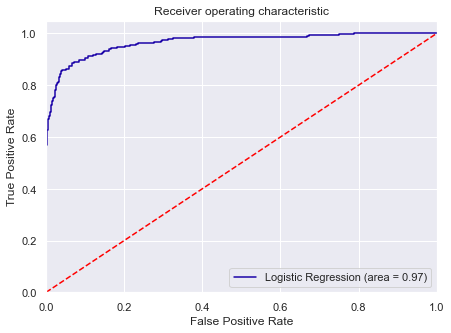

In [61]:
logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(X_train4))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train4))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test data

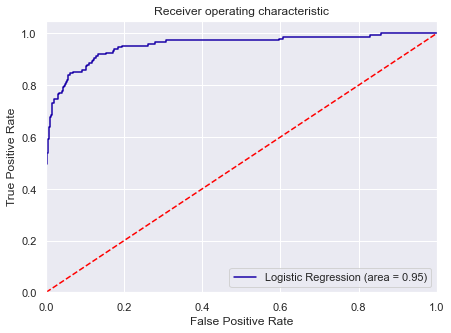

In [62]:
logit_roc_auc_test = roc_auc_score(y_test, lg4.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test4))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Logistic regression model is giving a generalized performance on training and testing set

#### Coefficient interpretations
* Coefficient of online and creditcard are negative increase in these will decrease in chances of a person accepting a personal loan
* Coefficient of income, Creditcard Average, number of family members, level of education, certificate of deposit account are positive which means increase in these will improve the chances of a customer accepting a personal loan offer.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

* Odds from coefficients

In [63]:
odds = np.exp(lg4.params) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train4.columns, columns=['odds']).T # adding the odds to a dataframe

,const,Income,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,CD_Account_1,Online_1,CreditCard_1
odds,0.000001,1.066031,1.25793,1.046061,12.590881,5.276717,55.059783,69.537901,24.245923,0.578511,0.405807


* Percentage change in odds

In [64]:
perc_change_odds = (np.exp(lg4.params)-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train4.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,const,Income,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,CD_Account_1,Online_1,CreditCard_1
change_odds%,-99.999854,6.603146,25.792981,4.606082,1159.088074,427.671679,5405.978304,6853.790081,2324.592309,-42.148863,-59.41927


### Coefficient Interpretations

* `Income`: Holding all other features constant a 1 unit increase in Income will increase the odds of a customer accepting a personal loan offer by 1.06 times or 6.6% increase in odds of a customer accepting personal loan
* `CCAvg`: Holding all other features constant a 1 unit increase in Average credit card usage per month will increase the odds of a customer accepting a personal loan offer by 1.25 times or 25.8% increase in odds of a customer accepting personal loan
* The odds of a customer accepting a personal loan offer who has a family size of 3 is 12.6 times higher than other family sizes and 4.6% chances of accepting a personal loan for a family of size 2
* The odds of a customer accepting a personal loan offer who has a advanced/ professional level education is 69.5 times higher than that of a graduate and undergraduate. The odds of a customer with graduate level is 55 times higher than other other education levels
* Using online banking and using a credit card of other bank decreases the odds of a customer accepting personal loan offer

In [65]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg4.predict(X_test4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.0547461015915265


In [66]:
testing = np.asarray(y_test)
misclassified = np.where(testing !=lg4.predict(X_test4))

In [67]:
# Model prediction with optimal threshold
pred_train_opt = (lg4.predict(X_train4)>optimal_threshold_auc_roc).astype(int)
pred_test_opt = (lg4.predict(X_test4)>optimal_threshold_auc_roc).astype(int)

In [68]:
scores_LR = get_metrics_score1(lg4,X_train4,X_test4,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.8657142857142858
Accuracy on test set :  0.8706666666666667
Recall on training set :  0.9214501510574018
Recall on test set :  0.912751677852349
Precision on training set :  0.40720961281708945
Precision on test set :  0.42902208201892744
F1 on training set :  0.5648148148148149
F1 on test set :  0.5836909871244634
ROC-AUC Score on training set :  0.8906714308458357
ROC-AUC Score on test set :  0.8893884221978251


* Precision of the model is decreased but recall is increased.
* Model still generalizes the performance between training and test data

#### Let's use Precision-Recall curve and see if we can find a better threshold

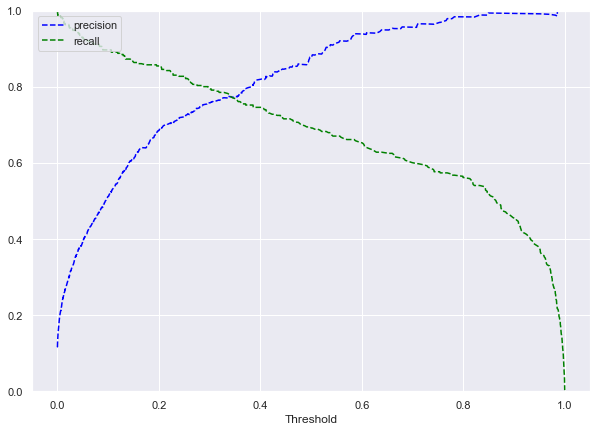

In [69]:
y_scores=lg4.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At a threshold of 0.36, we get balanced recall and precision

In [70]:
optimal_threshold_curve = 0.36

scores_LR = get_metrics_score1(lg4,X_train4,X_test4,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

Accuracy on training set :  0.9574285714285714
Accuracy on test set :  0.9566666666666667
Recall on training set :  0.7583081570996979
Recall on test set :  0.7046979865771812
Precision on training set :  0.784375
Precision on test set :  0.8333333333333334
F1 on training set :  0.7711213517665132
F1 on test set :  0.7636363636363636
ROC-AUC Score on training set :  0.8682673634977821
ROC-AUC Score on test set :  0.844576972563202


In [71]:
# defining list of model
models = [lg4]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train4,X_test4,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [72]:
# defining list of model
models = [lg4]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train4,X_test4,y_train,y_test,threshold=optimal_threshold_auc_roc,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [73]:
# defining list of model
models = [lg4]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train4,X_test4,y_train,y_test,threshold=optimal_threshold_curve,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [74]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0 .05',
                                          'Logistic Regression - Optimal threshold = 0 .36'
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })
                                    

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Logistic Regression Model - Statsmodels,0.961714,0.956000,0.691843,0.637584,0.877395,0.887850,0.773649,0.742188
1,Logistic Regression - Optimal threshold = 0 .05,0.865714,0.870667,0.921450,0.912752,0.407210,0.429022,0.564815,0.583691
2,Logistic Regression - Optimal threshold = 0 .36,0.957429,0.956667,0.758308,0.704698,0.784375,0.833333,0.771121,0.763636


### Conclusion
* We have been able to build a predictive model that can be used by AllLife Bank to find the customer accepting a personal loan offer with and f1_score of 0.77 on the training set (Logistic regression - Statsmodels with significant predictors)
* Coefficient of online and creditcard are negative increase in these will decrease in chances of a person accepting a personal loan
* Coefficient of income, Creditcard Average, number of family members, level of education, certificate of deposit account are positive which means increase in these will improve the chances of a customer accepting a personal loan offer.

## Decision Tree
### Model Building - Approach
1. Data Preparation
2. Splitting data into training and testing set
3. Build a CART model on Training Data
4. Perform Pre-Pruning and PostPruning of the tree
5. Applying model to the Test dataset

In [75]:
X = df.drop('Personal_Loan', axis = 1)
y = df[['Personal_Loan']]

In [76]:
X = pd.get_dummies(X, columns= ['Family','Education', 'Securities_Account', 'CD_Account', 'Online',
                                'CreditCard'], drop_first = True)

In [77]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


### Split Data

In [78]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape,X_test.shape)

(3500, 14) (1500, 14)


##  Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.9,1:0.1} to the model to specify the weight of each class and the decision tree will give more weightage to class 0.

* class_weight is a hyperparameter for the decision tree classifier.

In [79]:
model = DecisionTreeClassifier(criterion = 'gini',class_weight = {0:0.90, 1:0.10}, random_state = 1)

In [80]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, random_state=1)

In [81]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

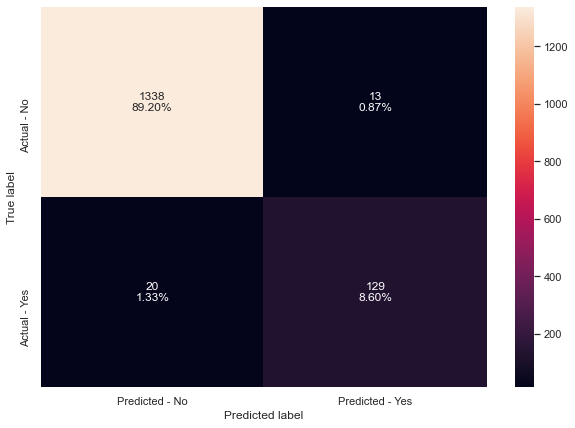

In [82]:
make_confusion_matrix(model,y_test)

### Insights:

- **True Positives:**
    - Reality: A customer accepted the personal loan offer
    - Model predicted: The customer will accept the personal loan offer.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT accept the personal loan offer.
    - Model predicted: The customer will NOT accept the personal loan offer.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT accept the personal loan.
    - Model predicted: The customer will accept the personal loan.
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the customers who will not be accepting the loan.

- **False Negatives:**
    - Reality: A customer accepted the personal loan offer.
    - Model predicted: The customer will NOT accept the personal loan offer.
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer which would have brought in an account and money. (Customer retention will get affected.)

* In this case a False negative is the biggest loss where we missed out a customer who would have taken a personal loan. Hence, recall is the right metric to check the performance of the model.

In [83]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [84]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8657718120805369


* There is a disparity in the performance of the model on training dataset and testing dataset which suggests that the model is overfitting.

### Visualizing the Decision Tree

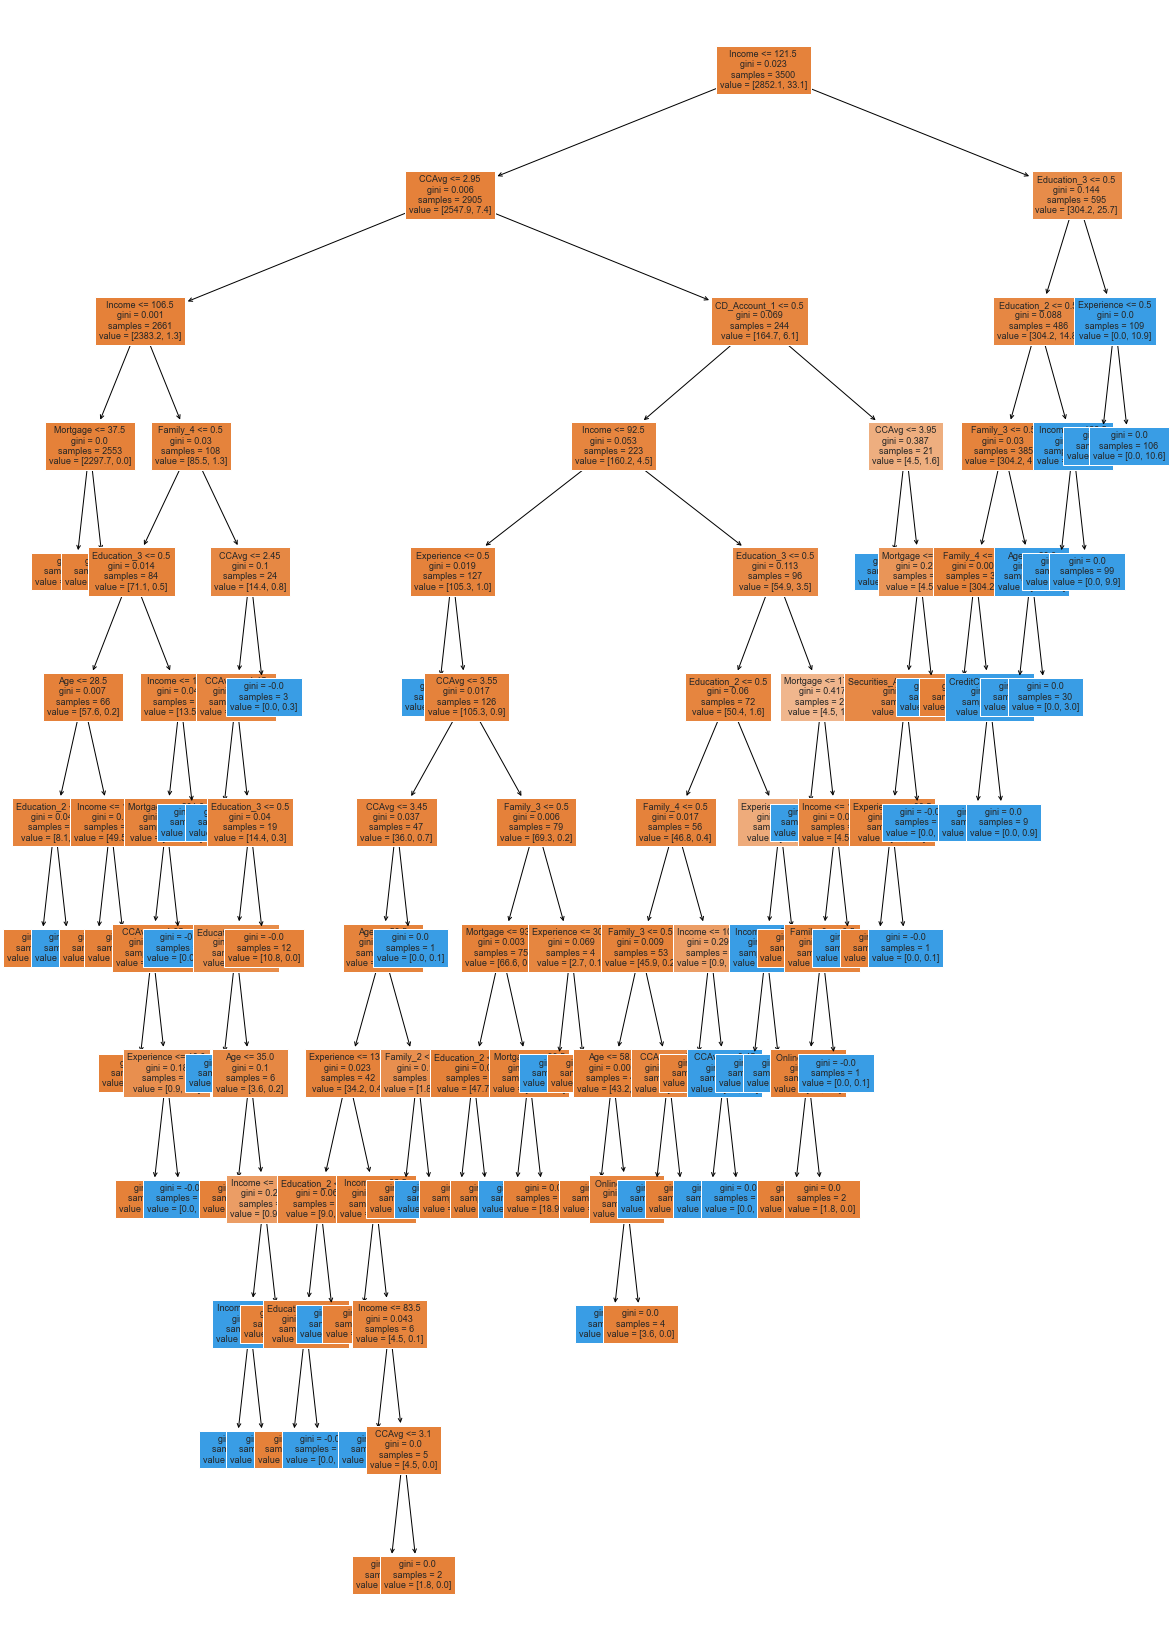

In [85]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [86]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 121.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- Mortgage <= 37.50
|   |   |   |   |--- weights: [1581.30, 0.00] class: 0
|   |   |   |--- Mortgage >  37.50
|   |   |   |   |--- weights: [716.40, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [8.10, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 0.20] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Income <= 108.50
|   |   |   |   |   |   |   |--- weights: [2.70, 0.00] class: 0
|   |   |   |   |   |   |--- Income >  108.50
|   |   |   |   |   |   |   |--- weights: [46.80, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Income <= 118.00
|   |   |   |   |   |   |--- Mortga

In [87]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Education_2           3.121331e-01
Education_3           3.089115e-01
Family_3              1.020410e-01
Income                7.260650e-02
Mortgage              5.093580e-02
Family_4              4.442368e-02
CCAvg                 4.413746e-02
Experience            3.936163e-02
CD_Account_1          9.925525e-03
Securities_Account_1  5.605820e-03
Family_2              5.501178e-03
Online_1              2.973610e-03
Age                   1.443281e-03
CreditCard_1          9.723873e-15


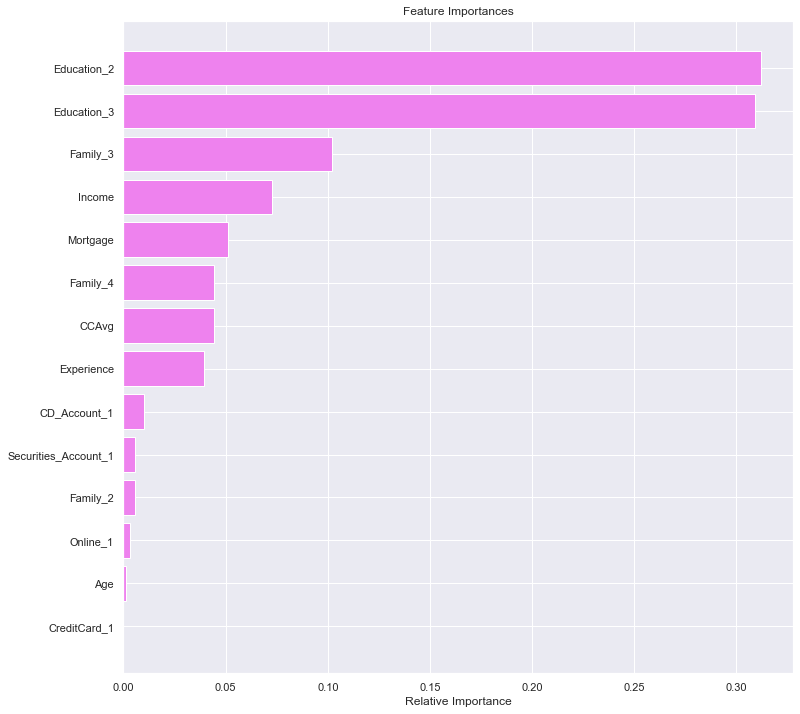

In [88]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree we built Education is most impotant feature to predict whether a customer would accept the personal loan or not

* We know that the decision tree above is overfitting, we have to reduce overfitting.

## Reducing over fitting

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0: 0.90, 1: 0.10})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, max_depth=8,
                       max_features='log2', min_impurity_decrease=1e-05,
                       random_state=1)

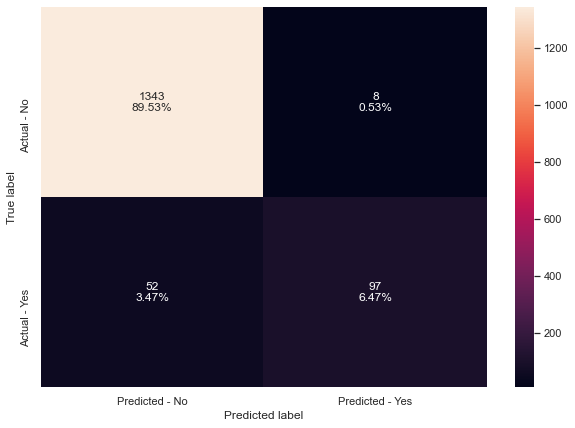

In [91]:
make_confusion_matrix(estimator,y_test)

In [92]:
get_recall_score(estimator)

Recall on training set :  0.6978851963746223
Recall on test set :  0.6510067114093959


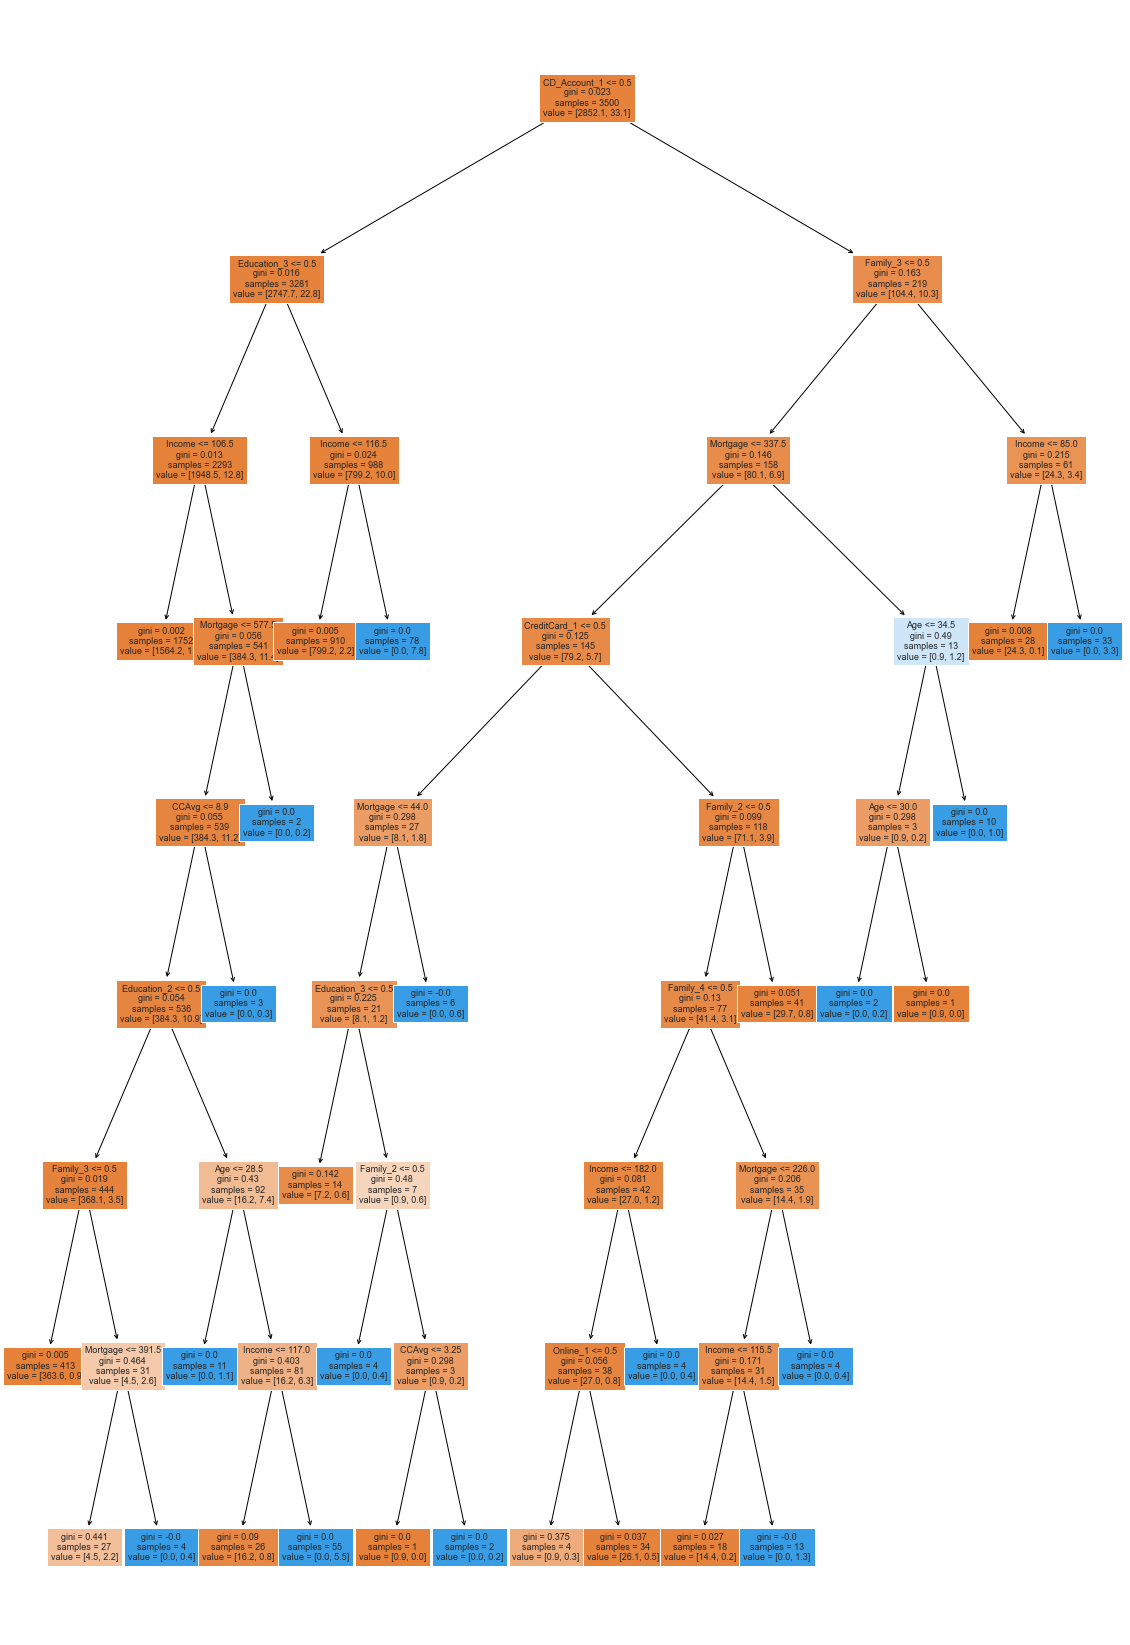

In [93]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [94]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                           Imp
Income                0.681703
Education_2           0.086814
Mortgage              0.068844
Age                   0.044744
Family_3              0.040644
CD_Account_1          0.030994
CCAvg                 0.018909
Family_2              0.009749
Education_3           0.006378
CreditCard_1          0.006233
Online_1              0.002596
Family_4              0.002393
Experience            0.000000
Securities_Account_1  0.000000


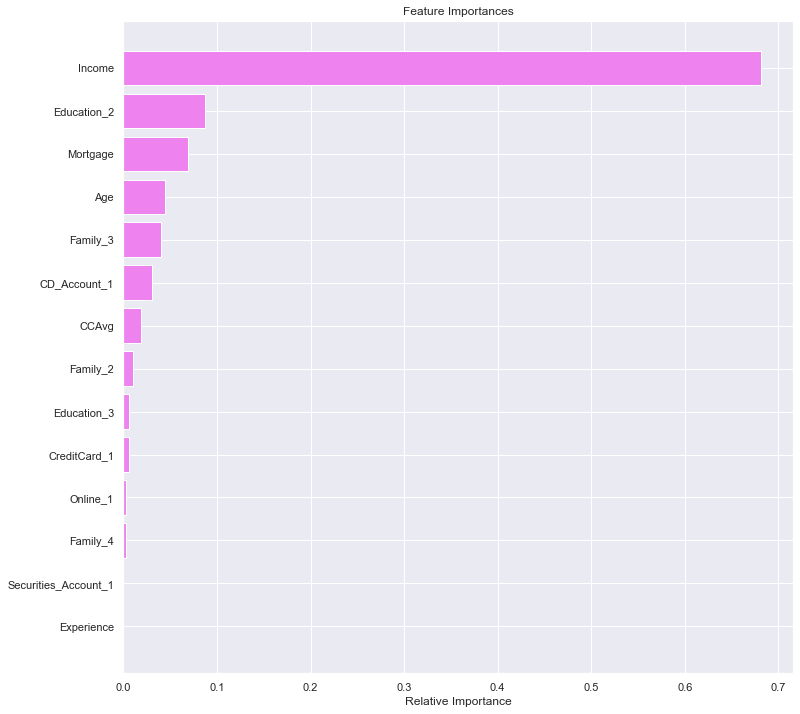

In [95]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [96]:
clf = DecisionTreeClassifier(random_state=1, class_weight = {0: 0.90, 1: 0.10})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [97]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.460737e-16
1,3.847993e-20,-1.460352e-16
2,3.847993e-20,-1.459967e-16
3,5.194791e-19,-1.454772e-16
4,5.194791e-19,-1.449578e-16
5,7.849906e-19,-1.441728e-16
6,5.714270e-18,-1.384585e-16
7,7.341971e-18,-1.311165e-16
8,2.205516e-16,8.943506e-17
9,5.203795e-16,6.098146e-16


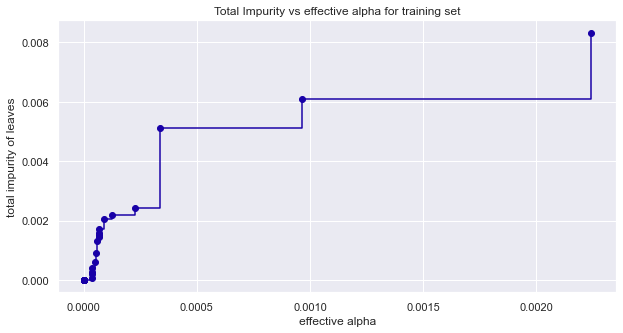

In [98]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [99]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight = {0:0.9, 1: 0.1})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.004786082369342062


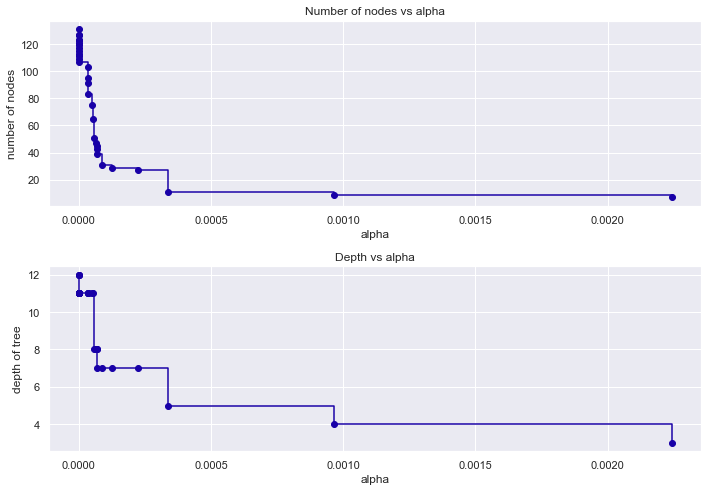

In [100]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [101]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [102]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [103]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

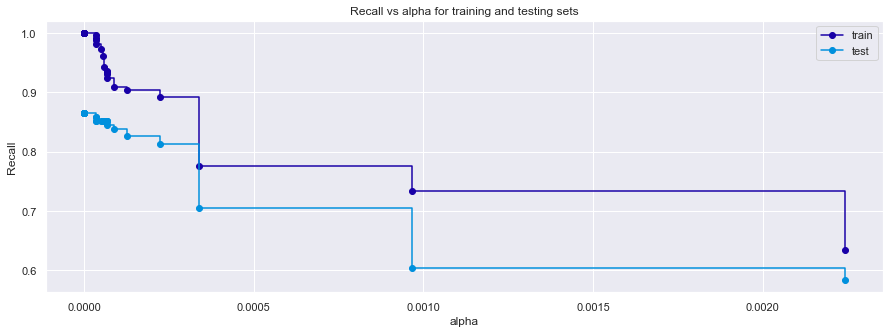

In [104]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0 alpha, but that is the maximum depth of the tree which is overfitting, so we can choose an alpha with a better recall, we choose 00019 retaining information and having a better recall.**

In [105]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, random_state=1)


In [106]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, random_state=1)

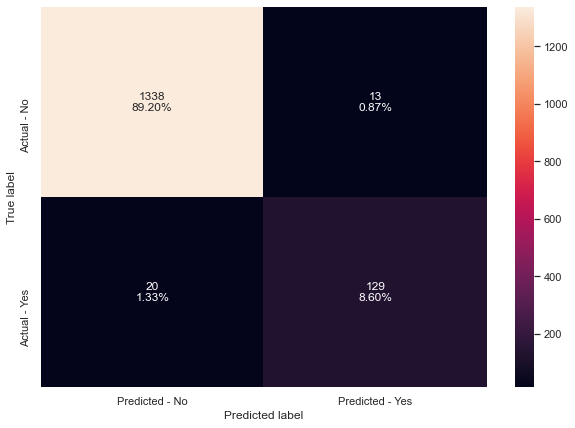

In [107]:
make_confusion_matrix(best_model,y_test)

In [108]:
get_recall_score(best_model)

Recall on training set :  1.0
Recall on test set :  0.8657718120805369


## Visualizing the Decision Tree

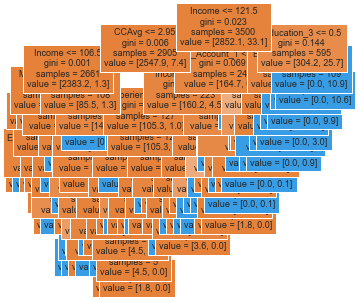

In [109]:
plt.figure(figsize=(5,5))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

#### Creating model with alpha value of 0.00019

In [110]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.00019,
                       class_weight={0: 0.9, 1: 0.1}, random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00019, class_weight={0: 0.9, 1: 0.1},
                       random_state=1)

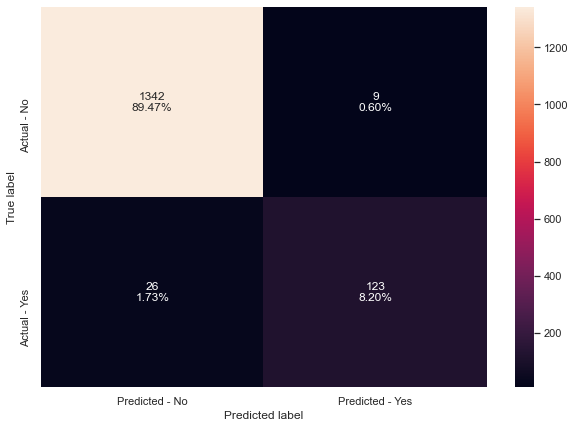

In [111]:
make_confusion_matrix(best_model2,y_test)

In [112]:
get_recall_score(best_model2)

Recall on training set :  0.9033232628398792
Recall on test set :  0.825503355704698


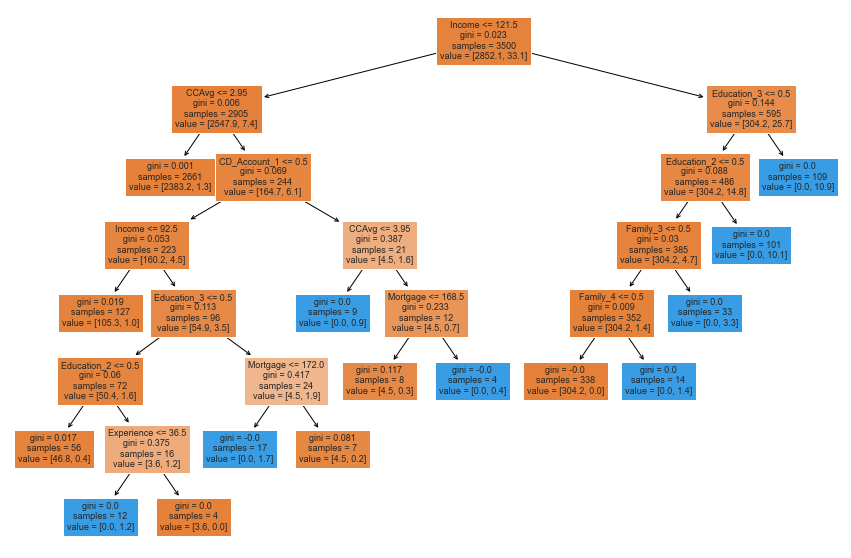

In [113]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [114]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Education_3           0.337880
Education_2           0.329455
Family_3              0.109431
Income                0.058861
Mortgage              0.049693
Family_4              0.047143
Experience            0.030445
CCAvg                 0.026105
CD_Account_1          0.010986
Age                   0.000000
Family_2              0.000000
Securities_Account_1  0.000000
Online_1              0.000000
CreditCard_1          0.000000


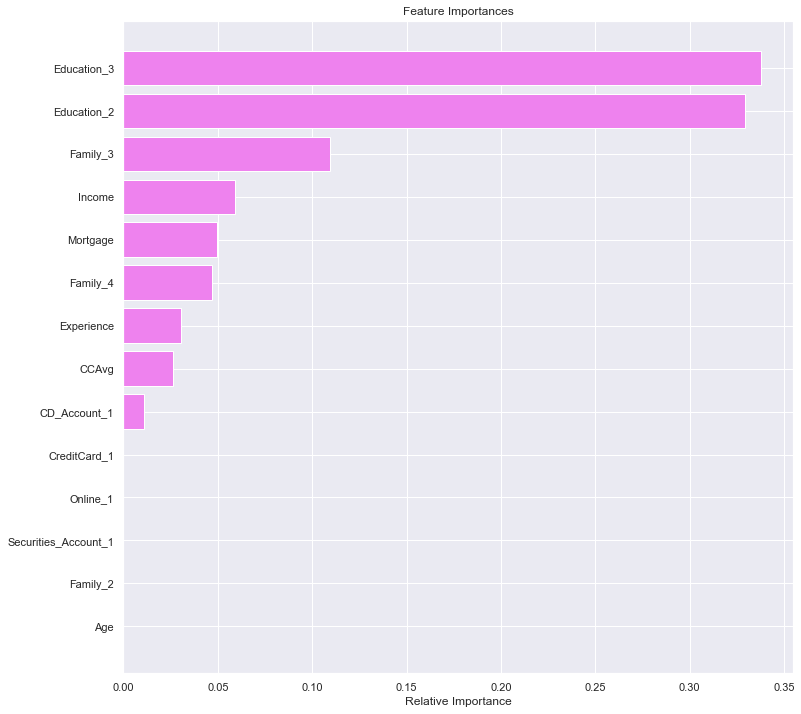

In [115]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Education levels and Family size are the top important features to predict customer's acceptance of the personal loan offer

### Comparing all the decision tree models

In [116]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,0.70,0.90], 'Test_Recall':[0.87,0.65,0.83]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.0,0.87
1,Decision treee with hyperparameter tuning,0.7,0.65
2,Decision tree with post-pruning,0.9,0.83


**Decision tree model with post pruning has given the best recall score on data.**

### Misclassification Analysis

* Creating a dataframe `predict` to store Predicted values and join them to the test data which results in a dataframe of all columns with the Predicted value
* Filter out misclassified records and perform analysis to find a pattern

In [117]:
predict = pd.DataFrame(best_model2.predict(X_test), index = X_test.index, columns=["Predict"])
ytest = pd.DataFrame(y_test)
Xtest = pd.DataFrame(X_test)
Test = Xtest.join(ytest)
TestFinal = Test.join(predict)
TestFinal.columns
Misclassified = TestFinal[TestFinal["Personal_Loan"]!=TestFinal["Predict"]]

In [118]:
Misclassified

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Personal_Loan,Predict
792,41,16,98,4.00,0,0,0,0,0,1,0,0,0,1,0,1
349,26,2,60,3.00,132,1,0,0,0,0,0,0,0,0,1,0
927,65,40,95,3.70,138,0,1,0,1,0,0,0,0,1,1,0
1518,43,17,64,3.00,221,0,0,1,0,1,0,0,1,0,1,0
2784,36,9,115,2.20,0,0,0,1,1,0,0,0,0,0,1,0
4302,52,27,85,3.40,0,0,1,0,0,1,0,0,0,0,1,0
12,48,23,114,3.80,0,1,0,0,0,1,1,0,0,0,0,1
1822,48,23,112,5.10,86,0,0,0,1,0,1,1,1,0,1,0
1784,54,29,119,2.00,0,0,1,0,0,0,1,1,0,0,1,0
2158,50,25,83,3.10,0,0,0,1,0,0,0,0,0,1,1,0


In [119]:
Misclassified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 792 to 2625
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   35 non-null     int64   
 1   Experience            35 non-null     int64   
 2   Income                35 non-null     int64   
 3   CCAvg                 35 non-null     float64 
 4   Mortgage              35 non-null     int64   
 5   Family_2              35 non-null     uint8   
 6   Family_3              35 non-null     uint8   
 7   Family_4              35 non-null     uint8   
 8   Education_2           35 non-null     uint8   
 9   Education_3           35 non-null     uint8   
 10  Securities_Account_1  35 non-null     uint8   
 11  CD_Account_1          35 non-null     uint8   
 12  Online_1              35 non-null     uint8   
 13  CreditCard_1          35 non-null     uint8   
 14  Personal_Loan         35 non-null     category
 15  Pred

In [120]:
df1 = df.copy()

In [121]:
missed = df1.loc[Misclassified.index]
missed

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
792,41,16,98,1,4.00,3,0,0,0,0,0,1
349,26,2,60,2,3.00,1,132,1,0,0,0,0
927,65,40,95,3,3.70,2,138,1,0,0,0,1
1518,43,17,64,4,3.00,3,221,1,0,0,1,0
2784,36,9,115,4,2.20,2,0,1,0,0,0,0
4302,52,27,85,3,3.40,3,0,1,0,0,0,0
12,48,23,114,2,3.80,3,0,0,1,0,0,0
1822,48,23,112,1,5.10,2,86,1,1,1,1,0
1784,54,29,119,3,2.00,1,0,1,1,1,0,0
2158,50,25,83,4,3.10,1,0,1,0,0,0,1


In [122]:
missedfinal = missed.merge(predict,left_index = True,right_index = True)
missedfinal

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Predict
792,41,16,98,1,4.00,3,0,0,0,0,0,1,1
349,26,2,60,2,3.00,1,132,1,0,0,0,0,0
927,65,40,95,3,3.70,2,138,1,0,0,0,1,0
1518,43,17,64,4,3.00,3,221,1,0,0,1,0,0
2784,36,9,115,4,2.20,2,0,1,0,0,0,0,0
4302,52,27,85,3,3.40,3,0,1,0,0,0,0,0
12,48,23,114,2,3.80,3,0,0,1,0,0,0,1
1822,48,23,112,1,5.10,2,86,1,1,1,1,0,0
1784,54,29,119,3,2.00,1,0,1,1,1,0,0,0
2158,50,25,83,4,3.10,1,0,1,0,0,0,1,0


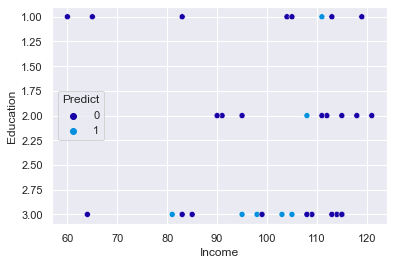

In [123]:
sns.scatterplot(x = "Income", y = "Education", data = missedfinal, hue = "Predict");

In [124]:
missedfinal.groupby(by =["CD_Account","Predict"]).size()

CD_Account  Predict
0           0          20
            1           7
1           0           6
            1           2
dtype: int64

* Misclassifications were majority where a customer who didnot have a Savings account which would not be a problem as bank's major aim was to convert existing liability customers to loan customers.

### Customer Segmentation

In [125]:
df[df["Personal_Loan"] == 0].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,4520.0,NaN,NaN,NaN,45.367257,11.450427,23.0,35.0,45.0,55.0,67.0
Experience,4520.0,NaN,NaN,NaN,20.165708,11.397783,0.0,10.0,20.0,30.0,43.0
Income,4520.0,NaN,NaN,NaN,66.237389,40.578534,8.0,35.0,59.0,84.0,224.0
Family,4520.0,4.0,1.0,1365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,4520.0,NaN,NaN,NaN,1.729009,1.567647,0.0,0.6,1.4,2.3,8.8
Education,4520.0,3.0,1.0,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,4520.0,NaN,NaN,NaN,51.789381,92.038931,0.0,0.0,0.0,98.0,635.0
Personal_Loan,4520.0,1.0,0.0,4520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities_Account,4520.0,2.0,0.0,4058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_Account,4520.0,2.0,0.0,4358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The minimum age of customer who didnot accept a personal loan offer is 23.
* Average income of the customer who didnot accept a personal loan is very low and there are high number of customers with a family size 1, who would not require a personal loan
* Average Mortgage of the customer who didnot accept a personal loan offer is very low 
* Majority of customers who didnot accept a personal loan also donot have a credit card of another bank.

In [126]:
df[df["Personal_Loan"] == 1].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,480.0,NaN,NaN,NaN,45.066667,11.590964,26.0,35.0,45.0,55.0000,65.0
Experience,480.0,NaN,NaN,NaN,19.843750,11.582443,0.0,9.0,20.0,30.0000,41.0
Income,480.0,NaN,NaN,NaN,144.745833,31.584429,60.0,122.0,142.5,172.0000,203.0
Family,480.0,4.0,4.0,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,480.0,NaN,NaN,NaN,3.905354,2.097681,0.0,2.6,3.8,5.3475,10.0
Education,480.0,3.0,3.0,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,480.0,NaN,NaN,NaN,100.845833,160.847862,0.0,0.0,0.0,192.5000,617.0
Personal_Loan,480.0,1.0,1.0,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities_Account,480.0,2.0,0.0,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_Account,480.0,2.0,0.0,340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Recommendations and Insights

* According to decision tree model - 
    a) If a customer has income less than 121,500 there's a very high chance that they will not accept a personal loan.
    b) If a customer has income greater than 121,500 and having an advanced/professional degree then there is a high chance of a customer accepting the personal loan offer
* If a customer has a credit card average greater than 4000 and a mortgage of amount greater than 160K has a higher chances of accepting the personal loan offer.
* There are around 60% of the customers without mortgage, bank can think about doing a mortgage campaign as house prices in California are on higher side that could bring in more customer base and monetary value
* Selling a personal loan to more educated and highly paid could be a starting point for the campaign.
* Referral bonus for existing customers is also an option that could encourage spread of word and bringing in credible options
* Customers who don't use AllLife Bank credit card could be targeted to gain credit card business which could also bring in customer base and revenue.